<a href="https://colab.research.google.com/github/aneekbsws/Convolutional-Neural-Networks/blob/main/tf_sign_languages.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [183]:
import h5py
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

For loading the dataset

In [184]:
train_dataset = h5py.File('train_signs.h5','r')
test_dataset = h5py.File('test_signs.h5','r')

X_train = np.array(train_dataset['train_set_x'][:])
Y_train = np.array(train_dataset['train_set_y'][:])

X_test = np.array(test_dataset['test_set_x'][:])
Y_test = np.array(test_dataset['test_set_y'][:])

Y_train = Y_train.reshape((1, Y_train.shape[0]))
Y_test = Y_test.reshape((1, Y_test.shape[0]))

print("X_train : " + str(X_train.shape))
print("Y_train : "+str(Y_train.shape))

X_train : (1080, 64, 64, 3)
Y_train : (1, 1080)


The labels

In [185]:
print(str(np.unique(Y_train)))

[0 1 2 3 4 5]


Visualising the first 25 images

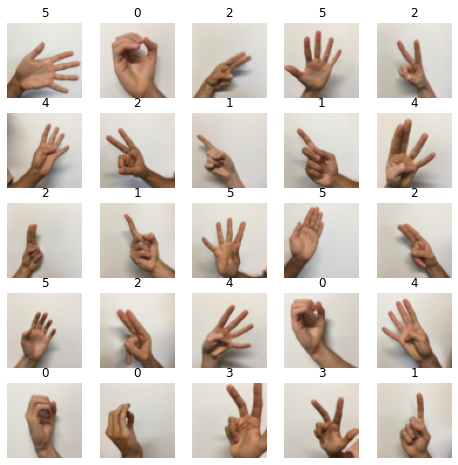

In [186]:
plt.figure(figsize=(8,8))
for i in range(25):
  ax = plt.subplot(5,5,i+1)
  plt.imshow(X_train[i])
  plt.title(str(np.squeeze(Y_train[:,i])))
  plt.axis('off')

Rescaling the data

In [187]:
def conv_one_hot(Y,C):
  print(Y.reshape(-1).shape)
  Y = np.eye(C)[Y.reshape(-1)] # for one-hot encoding we basically use 'np.eye(no_of_classes)[labels.reshape(-1)]'
  return Y

In [188]:
X_train = X_train/255
X_test = X_test/255
n_value = np.max(Y_train)+1
Y_train = conv_one_hot(Y_train,n_value)
Y_test = conv_one_hot(Y_test,n_value)
print(Y_train[:10,:])

print("X_train  :"+str(X_train.shape))
print("X_test : "+str(X_test.shape))
print("Y_train : "+str(Y_train.shape))
print("Y_test : "+str(Y_test.shape))

(1080,)
(120,)
[[0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]]
X_train  :(1080, 64, 64, 3)
X_test : (120, 64, 64, 3)
Y_train : (1080, 6)
Y_test : (120, 6)


In [189]:
def conv_model(input_shape):
  input_img = tf.keras.Input(shape=input_shape)
  Z1 = tf.keras.layers.Conv2D(filters = 8, kernel_size=(4,4), strides=(1,1), padding='same')(input_img)
  A1 = tf.keras.layers.ReLU()(Z1)
  P1 = tf.keras.layers.MaxPool2D(pool_size=(8,8), strides=(8,8), padding='same')(A1)
  Z2 = tf.keras.layers.Conv2D(filters = 16, kernel_size=(2,2), strides=(1,1), padding='same')(P1)
  A2 = tf.keras.layers.ReLU()(Z2)
  P2 = tf.keras.layers.MaxPool2D(pool_size=(4,4), strides=(4,4), padding='same')(A2)
  F = tf.keras.layers.Flatten()(P2)
  outputs = tf.keras.layers.Dense(units = 6, activation='softmax')(F)
  model = tf.keras.Model(inputs = input_img, outputs = outputs)
  return model

In [190]:
cnn_model = conv_model((64,64,3))
cnn_model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
cnn_model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 64, 64, 8)         392       
                                                                 
 re_lu_4 (ReLU)              (None, 64, 64, 8)         0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 8, 8, 8)          0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 8, 8, 16)          528       
                                                                 
 re_lu_5 (ReLU)              (None, 8, 8, 16)          0         
                                                           

In [192]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, Y_train)).batch(64)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, Y_test)).batch(64)
results = cnn_model.fit(train_dataset, epochs=100, validation_data=test_dataset)

Epoch 1/100
17/17 [==============================] - 3s 118ms/step - loss: 1.8043 - accuracy: 0.1481 - val_loss: 1.7966 - val_accuracy: 0.1333
Epoch 2/100
17/17 [==============================] - 2s 109ms/step - loss: 1.7930 - accuracy: 0.1861 - val_loss: 1.7931 - val_accuracy: 0.1917
Epoch 3/100
17/17 [==============================] - 2s 109ms/step - loss: 1.7900 - accuracy: 0.2037 - val_loss: 1.7910 - val_accuracy: 0.1833
Epoch 4/100
17/17 [==============================] - 2s 107ms/step - loss: 1.7879 - accuracy: 0.2194 - val_loss: 1.7896 - val_accuracy: 0.1750
Epoch 5/100
17/17 [==============================] - 2s 107ms/step - loss: 1.7862 - accuracy: 0.2454 - val_loss: 1.7881 - val_accuracy: 0.1750
Epoch 6/100
17/17 [==============================] - 2s 107ms/step - loss: 1.7837 - accuracy: 0.2639 - val_loss: 1.7871 - val_accuracy: 0.2083
Epoch 7/100
17/17 [==============================] - 2s 109ms/step - loss: 1.7798 - accuracy: 0.2741 - val_loss: 1.7865 - val_accuracy: 0.2250

In [193]:
import pandas as pd

In [194]:
df_loss_history = pd.DataFrame(results.history)
df_loss_history.head

<bound method NDFrame.head of         loss  accuracy  val_loss  val_accuracy
0   1.804271  0.148148  1.796595      0.133333
1   1.793019  0.186111  1.793148      0.191667
2   1.789981  0.203704  1.791001      0.183333
3   1.787910  0.219444  1.789645      0.175000
4   1.786191  0.245370  1.788109      0.175000
..       ...       ...       ...           ...
95  0.371856  0.891667  0.552030      0.800000
96  0.369000  0.890741  0.548563      0.800000
97  0.365917  0.889815  0.546112      0.800000
98  0.362830  0.892593  0.543448      0.800000
99  0.360109  0.892593  0.541559      0.800000

[100 rows x 4 columns]>

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


[Text(0, 0.5, 'Accuracy'), Text(0.5, 0, 'Epoch')]

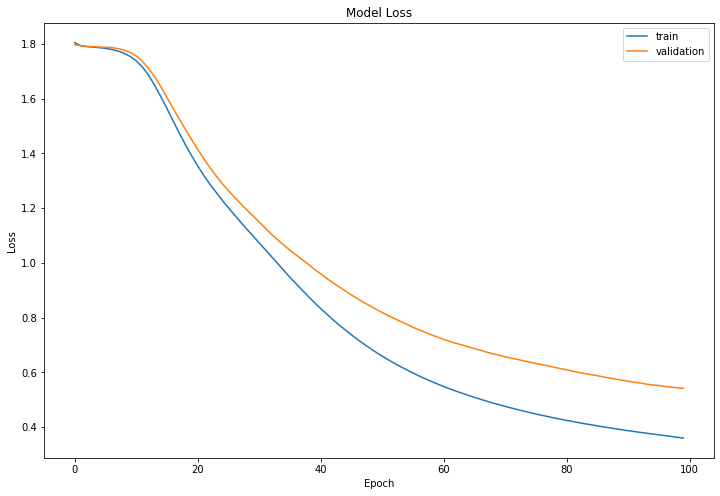

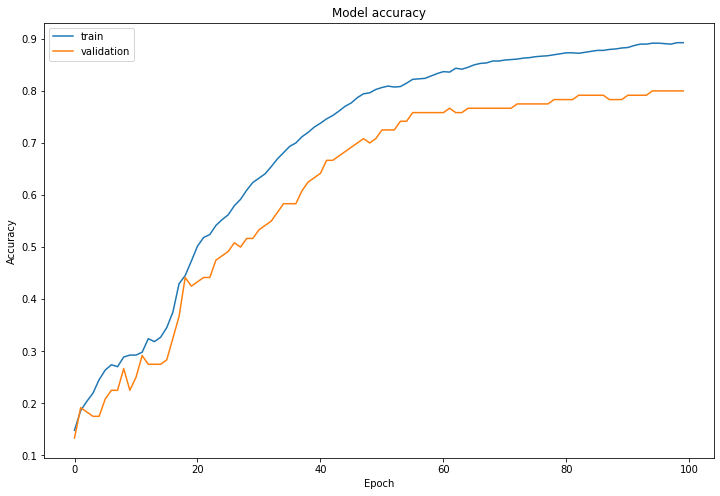

In [195]:
df_loss = df_loss_history[['loss','val_loss']]
df_loss.rename(columns={'loss':'train', 'val_loss':'validation'}, inplace = True)
df_acc = df_loss_history[['accuracy','val_accuracy']]
df_acc.rename(columns={'accuracy':'train', 'val_accuracy':'validation'}, inplace = True)
df_loss.plot(title="Model Loss", figsize=(12,8)).set(xlabel='Epoch', ylabel='Loss')
df_acc.plot(title = 'Model accuracy', figsize=(12,8)).set(xlabel='Epoch', ylabel='Accuracy')